# Variational Methods for PDEs

<div class="alert alert-block alert-success">
$\newcommand{\R}{\mathbb{R}} \newcommand{\Z}{\mathbb{Z}} \newcommand{\N}{\mathbb{N}} 
\newcommand{\bff}{\mathbf{f}} \newcommand{\bx}{\mathbf{x}} 
\newcommand{\by}{\mathbf{y}} \newcommand{\bo}{\mathbb{1}} \newcommand{\bJ}{\mathbf{J}}$
The aim of this notebook is to consolidate the plots for the Variational Methods for PDEs notes.
</div>

<div class="alert alert-block alert-info">
The following packages are loaded into the environment. 
</div>

In [1]:
import numpy as np
from numpy import asarray, array, exp, arange, reciprocal, linspace, zeros
from numpy.linalg import norm

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

## User's Guide to Sobolev Spaces

In [2]:
def Mollifier(x):
    return exp(reciprocal(norm(x,2, axis = 0)**2 - 1))/0.443994

In [3]:
sup = linspace(-0.99,0.99,endpoint=True)

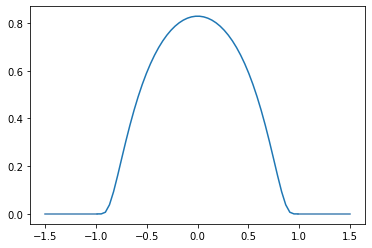

In [4]:
plt.plot(sup, Mollifier([sup]))
plt.plot([-1.5,-0.99],[0,0], color='steelblue')
plt.plot([0.99,1.5],[0,0], color='steelblue')
plt.show()

In [5]:
ε = linspace(0.25,1,5)[::-1]

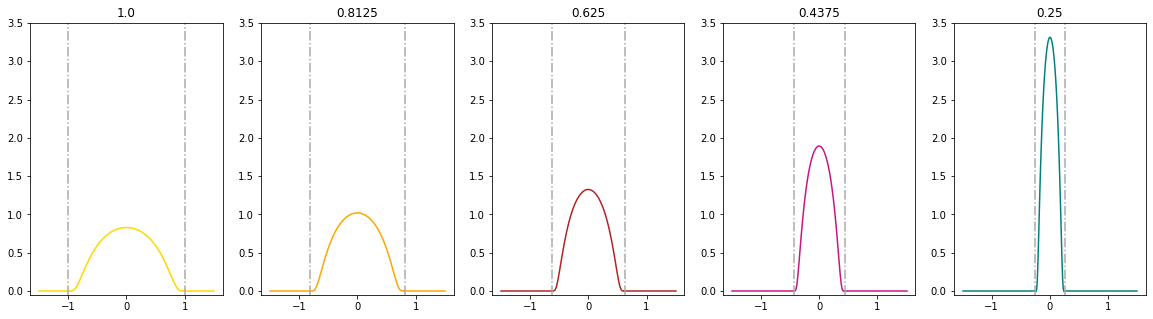

In [8]:
colors = ['gold', 'orange', 'firebrick','mediumvioletred', 'teal']
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for i,j in enumerate(ε):
    ax[i].plot(sup * ε[i], ε[i]**-1 * Mollifier([sup]), color = colors[i])
    ax[i].plot([(sup[-1]* ε[i]),1.5],[0,0], color = colors[i])
    ax[i].plot([-1.5,(sup[0]* ε[i])],[0,0], color = colors[i])
    ax[i].set_title(j)
    ax[i].set_ylim([-0.05,3.5])
    ax[i].axvline(x= ε[i], linestyle='-.', color = 'darkgray')
    ax[i].axvline(x=-ε[i], linestyle='-.', color = 'darkgray')

plt.savefig('Fig-1_Moll.pdf', transparent = True, bbox_inches = 'tight')

<div class="alert alert-block alert-warning">

</div>